In [1]:
!pip install selenium
!pip install selenium-stealth
!pip install beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [3]:
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.common.by import By
from time import sleep
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
chr_options =webdriver.ChromeOptions()
chr_options.add_argument('--headless')
chr_options.add_argument('--window-size=1920,1080')
chr_options.add_argument('--no-sandbox')
chr_options.add_argument('--disable-dev-shm-usage')
chr_options.add_argument('--enable-javascript')

In [18]:
driver = webdriver.Chrome(options = chr_options)
stealth(driver,

 languages=["en-US", "en"],

 vendor="Google Inc.",

 platform="Win32",

 webgl_vendor="Intel Inc.",

 renderer="Intel Iris OpenGL Engine",

 fix_hairline=True,

)
url = 'https://www.kayak.com/flights/HEL-LON/2023-11-06?sort=bestflight_a'
driver.get(url)

sleep(5)

#clicking the button to load all the flights
while True:
    try:
      driver.find_element(By.XPATH, '//div[@class="ULvh-button show-more-button"]').click()
      sleep(2)
    except:
       break

flights = driver.find_elements(By.XPATH, '//div[@class="nrc6-inner"]')

f_data = []

#collecting the data

for WebElement in flights:
    HTML = WebElement.get_attribute('outerHTML')
    Soup = BeautifulSoup(HTML, 'html.parser')

    temp_price = Soup.find("div", {"class": "nrc6-price-section"})
    price = temp_price.find("div", {"class": "f8F1-price-text"}).text
    price = price.replace(',','')
    price = int(price.replace('$',''))

    temp_company = Soup.find("div", {"class": "VY2U"})
    company = temp_company.find("div", {"class": "c_cgF c_cgF-mod-variant-default"}).text

    temp_duration = Soup.find("div", {"class": "xdW8"})
    duration = temp_duration.find("div", {"class": "vmXl vmXl-mod-variant-default"}).text

    temp_departure = Soup.find("div", {"class": "VY2U"})
    departure = temp_departure.find("span").text

    layover = Soup.find("span", {"class": "JWEO-stops-text"}).text

    website = 'Kayak'

    f_data.append([price, company, departure, duration, layover, website])

driver.quit()

In [19]:
driver = webdriver.Chrome(options = chr_options)
stealth(driver,

 languages=["en-US", "en"],

 vendor="Google Inc.",

 platform="Win32",

 webgl_vendor="Intel Inc.",

 renderer="Intel Iris OpenGL Engine",

 fix_hairline=True,

)
url = 'https://www.momondo.com/flight-search/HEL-LON/2023-11-06?sort=bestflight_a'
driver.get(url)

sleep(5)

#clicking the button to load all the flights

while True:
    try:
      driver.find_element(By.XPATH, '//div[@class="ULvh-button show-more-button"]').click()
      sleep(2)
    except:
       break

flights = driver.find_elements(By.XPATH, '//div[@class="nrc6-inner"]')

#collecting the data

for WebElement in flights:
    HTML = WebElement.get_attribute('outerHTML')
    Soup = BeautifulSoup(HTML, 'html.parser')

    temp_price = Soup.find("div", {"class": "nrc6-price-section"})
    price = temp_price.find("div", {"class": "f8F1-price-text"}).text
    price = price.replace(',','')
    price = int(price.replace('$',''))

    temp_company = Soup.find("div", {"class": "VY2U"})
    company = temp_company.find("div", {"class": "c_cgF c_cgF-mod-variant-default"}).text

    temp_duration = Soup.find("div", {"class": "xdW8"})
    duration = temp_duration.find("div", {"class": "vmXl vmXl-mod-variant-default"}).text

    temp_departure = Soup.find("div", {"class": "VY2U"})
    departure = temp_departure.find("span").text

    layover = Soup.find("span", {"class": "JWEO-stops-text"}).text

    website = 'Momondo'

    f_data.append([price, company, departure, duration, layover, website])

driver.quit()

In [20]:
df = pd.DataFrame(f_data, columns=['Price', 'Airline', 'Departure', 'Duration', 'Stops', 'Website'])

In [28]:
df

,Price,Airline,Departure,Duration,Stops,Website
0,32,Ryanair,10:10 pm,3h 10m,nonstop,Kayak
1,59,Norwegian,9:50 am,3h 10m,nonstop,Kayak
2,137,Finnair,7:35 pm,3h 05m,nonstop,Kayak
3,146,Finnair,7:50 am,3h 20m,nonstop,Kayak
4,150,British Airways,7:35 pm,3h 05m,nonstop,Kayak
...,...,...,...,...,...,...
370,258,SWISS,10:15 am,9h 35m,2 stops,Momondo
371,213,Lufthansa,10:15 am,12h 45m,2 stops,Momondo
372,311,KLM,7:00 am,4h 30m,1 stop,Momondo
373,197,Lufthansa,7:00 am,12h 05m,1 stop,Momondo


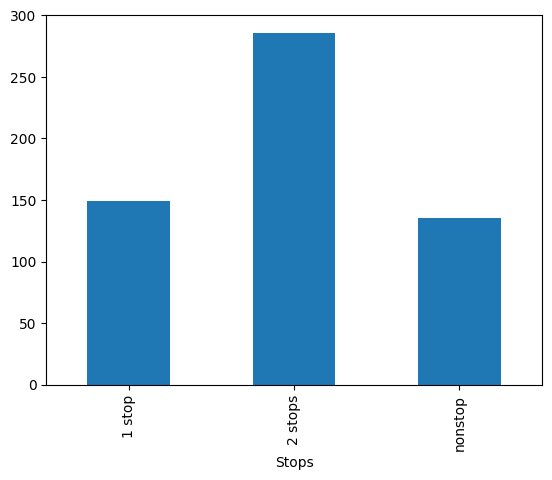

In [38]:
df.groupby('Stops')['Price'].mean().plot.bar()
plt.show()

In [27]:
df.sort_values('Price')

,Price,Airline,Departure,Duration,Stops,Website
0,32,Ryanair,10:10 pm,3h 10m,nonstop,Kayak
210,32,Ryanair,10:10 pm,3h 10m,nonstop,Momondo
1,59,Norwegian,9:50 am,3h 10m,nonstop,Kayak
211,59,Norwegian,9:50 am,3h 10m,nonstop,Momondo
23,66,Norwegian,7:45 pm,18h 35m,1 stop,Kayak
...,...,...,...,...,...,...
202,694,Scandinavian Airlines,1:30 pm,8h 00m,2 stops,Kayak
203,694,Scandinavian Airlines,1:30 pm,8h 00m,2 stops,Kayak
205,694,Scandinavian Airlines,10:15 am,9h 25m,2 stops,Kayak
208,785,Iberia,7:45 am,12h 30m,2 stops,Kayak
